


✅ Model loaded successfully!
1/1 [==============================] - 6s 6s/step


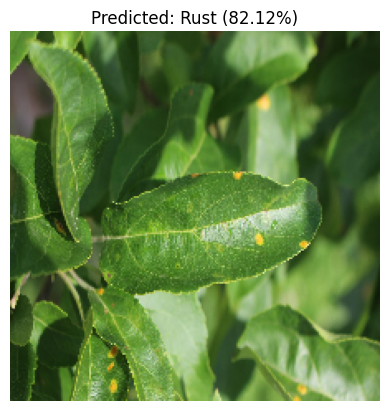

1/1 [==============================] - 0s 179ms/step


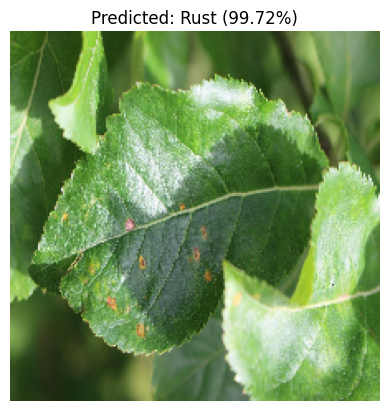

1/1 [==============================] - 0s 234ms/step


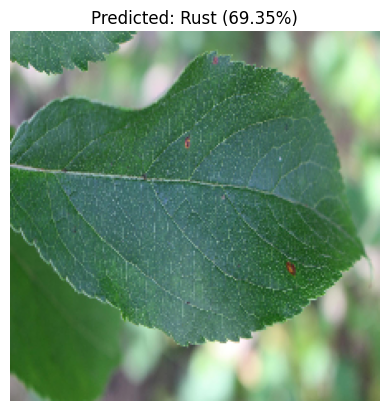

1/1 [==============================] - 0s 218ms/step


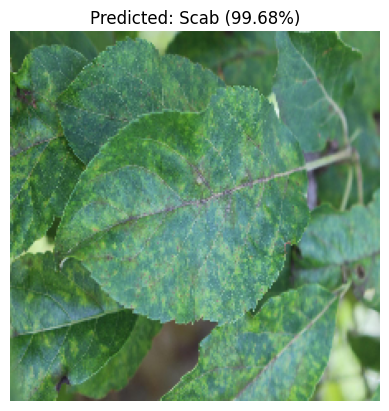

1/1 [==============================] - 0s 287ms/step


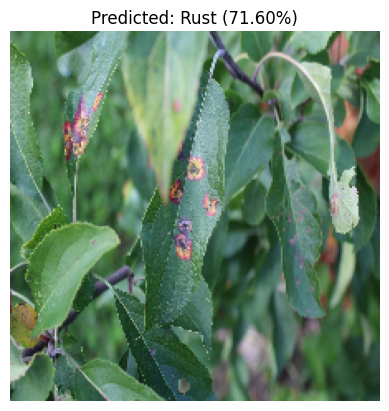

1/1 [==============================] - 0s 327ms/step


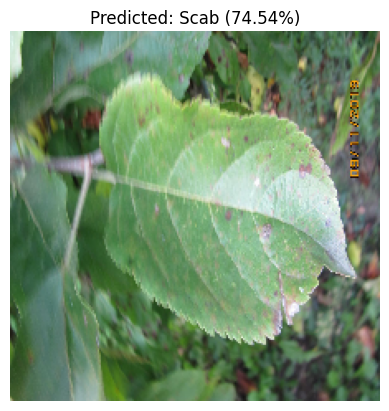

1/1 [==============================] - 0s 210ms/step


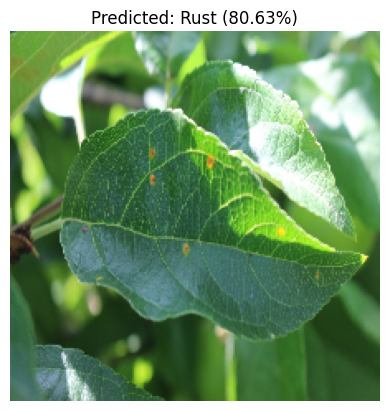

1/1 [==============================] - 0s 219ms/step


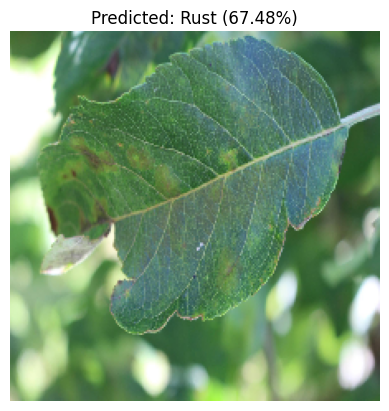

1/1 [==============================] - 0s 322ms/step


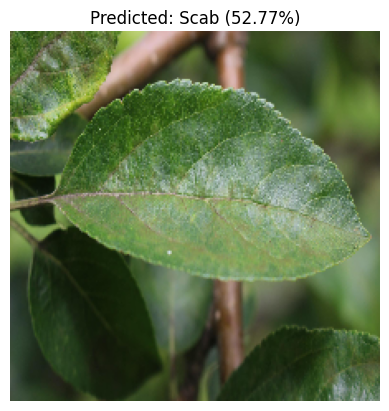

1/1 [==============================] - 0s 362ms/step


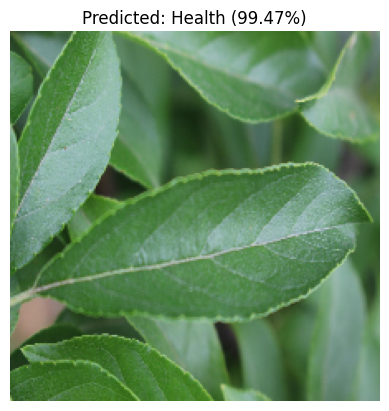

In [1]:
# Apple Leaf Disease Detection — Inference Script

import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# ================================
# Paths & Parameters
# ================================
model_path = '../models/apple_leaf_cnn_model.h5'
test_images_dir = '../data/disease_detection/unlabeled/images/'  # Path to your new test images
IMG_SIZE = 224

# ================================
# Load Trained Model
# ================================
model = tf.keras.models.load_model(model_path)
print("✅ Model loaded successfully!")

# ================================
# Get Class Labels
# ================================
class_indices = {'Alternaria leaf spot': 0, 'Brown spot': 1, 'Frogeye leaf spot': 2,
                 'Grey spot': 3, 'Health': 4, 'Mosaic': 5, 'Powdery mildew': 6,
                 'Rust': 7, 'Scab': 8}
class_labels = list(class_indices.keys())

# ================================
# Prediction Function
# ================================
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    preds = model.predict(img_array)
    predicted_class = class_labels[np.argmax(preds)]
    confidence = np.max(preds) * 100

    return predicted_class, confidence, img

# ================================
# Run Inference on Test Images
# ================================
test_images = [f for f in os.listdir(test_images_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

for img_file in test_images[:10]:  # limit to first 10 images for demo
    img_path = os.path.join(test_images_dir, img_file)
    predicted_class, confidence, img = predict_image(img_path)

    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class} ({confidence:.2f}%)")
    plt.axis('off')
    plt.show()